<a href="https://colab.research.google.com/github/Akshi01/Lead-Scoring-Model/blob/main/LeadScoringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (13,6)
import seaborn as sns
sns.set_palette("Set3")

In [ ]:
data = pd.read_csv('Leads X Education.csv')

In [ ]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
data.shape

(9240, 37)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
data1 = data.copy()

## Filtering out irrelevant columns or those not providing any information



In [ ]:
col1 = ['Prospect ID', 'Lead Number']
data1.drop(data1[col1], axis = 1, inplace = True)

In [ ]:
col2 = ['Do Not Email', 'Do Not Call']
for x in col2:
  print(data1[x].value_counts())
  print('*' * 40)
  print("\n")

No     8506
Yes     734
Name: Do Not Email, dtype: int64
****************************************


No     9238
Yes       2
Name: Do Not Call, dtype: int64
****************************************




In [ ]:
data1.drop(data1[col2], axis = 1, inplace = True)

In [ ]:
data1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
data1.drop(['Country'], axis = 1, inplace = True)

In [ ]:
col3 = ['How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement', 'Newspaper', 'Through Recommendations']
for x in col3:
  print(data1[x].value_counts())
  print('*' * 60)
  print("\n")

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
************************************************************


No     9226
Yes      14
Name: Search, dtype: int64
************************************************************


No    9240
Name: Magazine, dtype: int64
************************************************************


No     9238
Yes       2
Name: Newspaper Article, dtype: int64
************************************************************


No     9239
Yes       1
Name: X Education Forums, dtype: int64
************************************************************


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
************************************************

### ***The above suggests that X edducation should invest more in adversting the company and their services.***

In [ ]:
data1.drop(data1[col3], axis = 1, inplace = True)

In [ ]:
data1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
data1.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [ ]:
data1['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
data1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
col4 = ['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

for x in col4:
  print(data1[x].value_counts())
  print('*' * 60)
  print("\n")

No    9240
Name: Receive More Updates About Our Courses, dtype: int64
************************************************************


No    9240
Name: Update me on Supply Chain Content, dtype: int64
************************************************************


No    9240
Name: Get updates on DM Content, dtype: int64
************************************************************


No    9240
Name: I agree to pay the amount through cheque, dtype: int64
************************************************************




In [ ]:
data1.drop(data1[col4], axis = 1, inplace = True)

In [ ]:
col5 = ['Tags', 'Lead Profile', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Last Activity']

for x in col5:
  print(data1[x].value_counts())
  print("*" * 70)
  print("\n")

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
#since 'Last Notable Activity' and 'Last Activity' are very similar, we can get rid of the either

data1.drop(['Last Notable Activity'], inplace = True, axis = 1)

Combining data in 'Tags' and 'Last Activity' to get a better picture

In [ ]:
#Tags
tags = data1['Tags'].value_counts()
tags_less_than_100 = tags [tags < 100]

data1['Tags'] = data1['Tags'].apply(lambda x: 'Others' if x in tags_less_than_100 else x)
data1['Tags'].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [ ]:
#Notable Activity
activity = data1['Last Activity'].value_counts()
activity_less_than_50 = activity [activity < 50]

data1['Last Activity'] = data1['Last Activity'].apply(lambda x: 'Other' if x in activity_less_than_50 else x)
data1['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [ ]:
col6 = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

for x in col6:
  print(data1[x].value_counts())
  print("*" * 50)
  print("\n")

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
**************************************************


02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
**************************************************


14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
**************************************************


15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64
**************************************************




these 4 columns contain around 45% null but since they seem important, we can keep 'Asymmetrique Activity Index' and 'Asymmetrique Profile Index'.

In [ ]:
drop_col = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']

data1.drop(data1[drop_col], axis = 1, inplace = True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  Lead Quality                            4473 non-null   obje

In [ ]:
data2 = data1.copy()

Handling null values

In [ ]:
data2.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
Lead Profile                              2709
City                                      1420
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
A free copy of Mastering The Interview       0
dtype: int64

In [ ]:
null_values_perc = (data2.isnull().sum()/len(data1))*100
null_values_perc

Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              29.318182
City                                      15.367965
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
A free copy of Mastering The Interview     0.000000
dtype: float64

In [ ]:
col_few_na = ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

data2.dropna(subset = col_few_na, axis = 0, inplace=True)

In [ ]:
data3 = data2.copy()

EDA

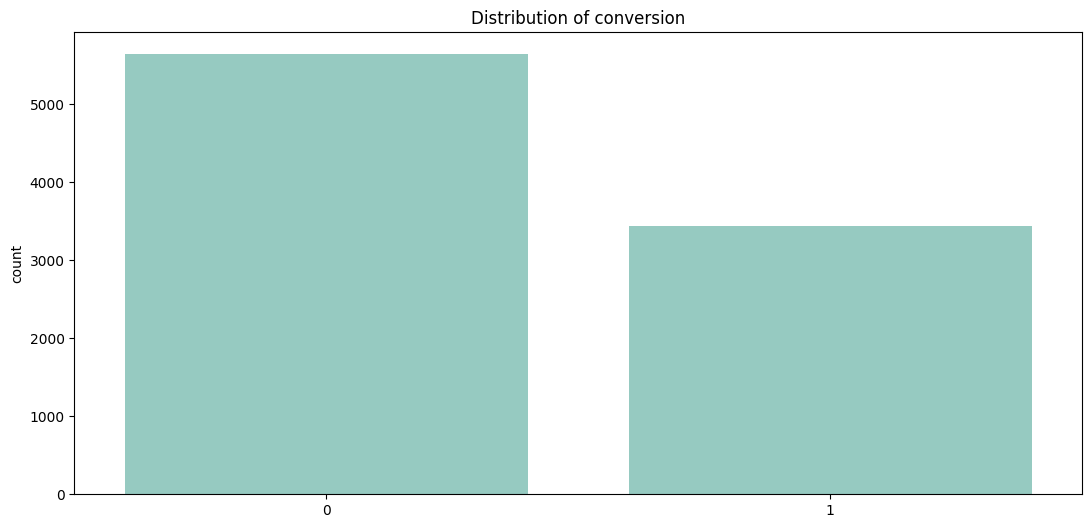

In [ ]:
sns.countplot(x='Converted', data=data3)
plt.title("Distribution of conversion")
plt.xlabel("")
plt.show()

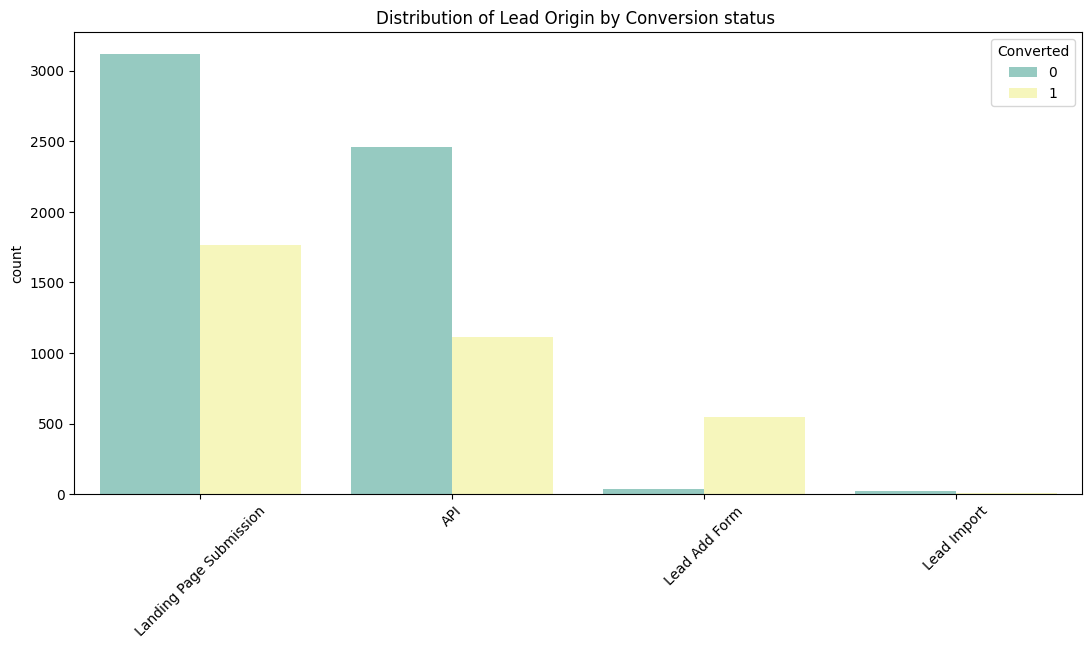

In [ ]:
origin_count = data3['Lead Origin'].value_counts().sort_values(ascending=False).index
sns.countplot(x = data3['Lead Origin'], data = data3, order = origin_count, hue = 'Converted' )
plt.title("Distribution of Lead Origin by Conversion status ")
plt.xlabel("")
plt.xticks(rotation = 45);

### Understanding the lead origin is crucial to analyze the effectiveness of different channels. API and Landing page submissions appear to be the most popular source of origin of leads. 'Lead add form', though not large in number, contributes to more lead conversion.

In [ ]:
data_l = data3['Lead Source'].value_counts()
lead_less_than_100 = data_l[data_l < 100]

data3['Lead Source'] = data3['Lead Source'].apply(lambda x: 'Others' if x in lead_less_than_100 else x)
data3['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                59
Name: Lead Source, dtype: int64

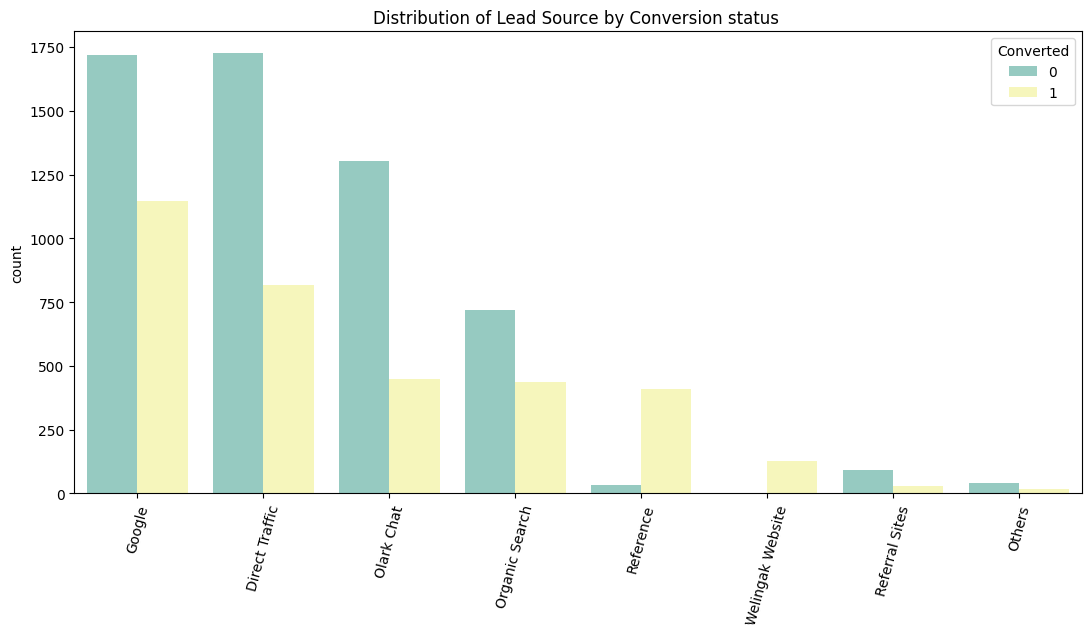

In [ ]:
source_count = data3['Lead Source'].value_counts().sort_values(ascending=False).index
sns.countplot(x = data3['Lead Source'], data = data3, order = source_count, hue = 'Converted')
plt.title("Distribution of Lead Source by Conversion status ")
plt.xlabel("")
plt.xticks(rotation = 75);

### Google and direct traffic are the two major sources of leads. Interestingly, 'reference', though not a major contributor, contributes more to lead conversion

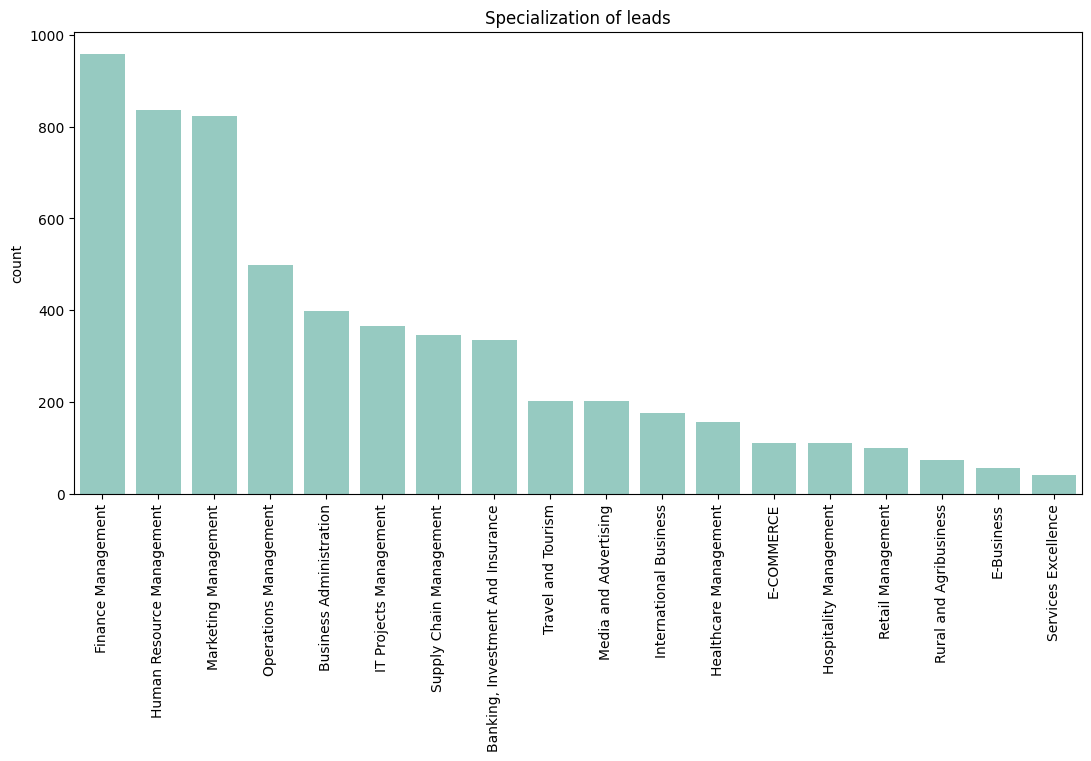

In [ ]:
data_c = data3[(data3['Specialization'] != 'NA') & (data3['Specialization'] != 'Select')]
sns.countplot(x = 'Specialization', data = data_c, order = data_c['Specialization'].value_counts().index)
plt.title("Specialization of leads")
plt.xlabel("")
plt.xticks(rotation = 90);

### Most of the leads come from Finance, HR and marketing management backgrounds

In [ ]:
act_data = data3['Last Activity'].value_counts()
activity_less_than_100 = act_data[act_data < 100]

data3['Last Activity'] = data3['Last Activity'].apply(lambda x: 'Others' if x in activity_less_than_100 else x)
data3['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

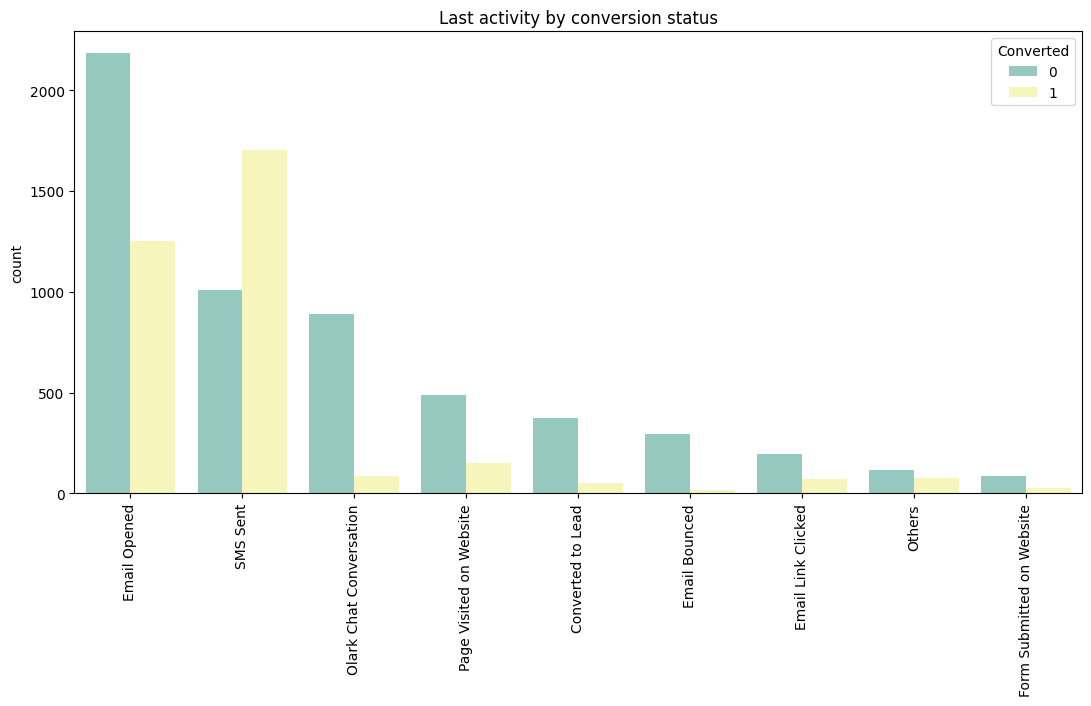

In [ ]:
activity = data3['Last Activity'].value_counts().index
sns.countplot(x = 'Last Activity', data=data3, order = activity, hue = 'Converted')
plt.title("Last activity by conversion status")
plt.xlabel("")
plt.xticks(rotation=90);

### With 'email opened' and 'SMS sent' being the top activites, conversion of leads with last activity as 'SMS sent' more likely to happen.

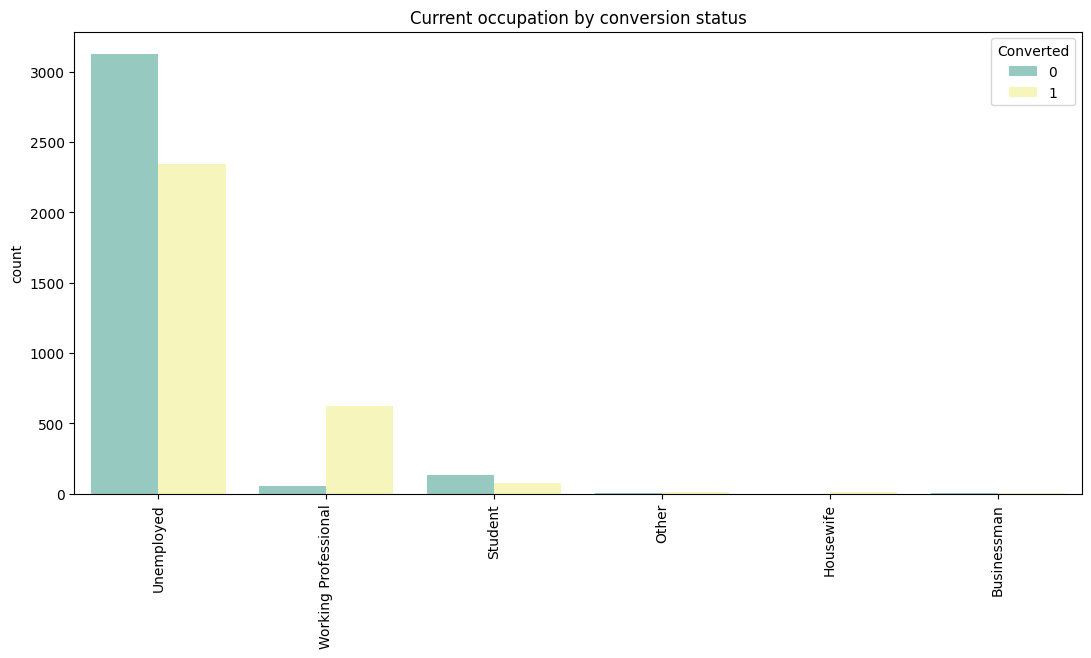

In [ ]:
occupation = data3['What is your current occupation'].value_counts().index
sns.countplot(x = 'What is your current occupation', data=data3, order = occupation, hue = 'Converted')
plt.title("Current occupation by conversion status")
plt.xlabel("")
plt.xticks(rotation=90);

### Most of the leads come under 'unemployed' category but 'working professional' are more likely to convert to leads

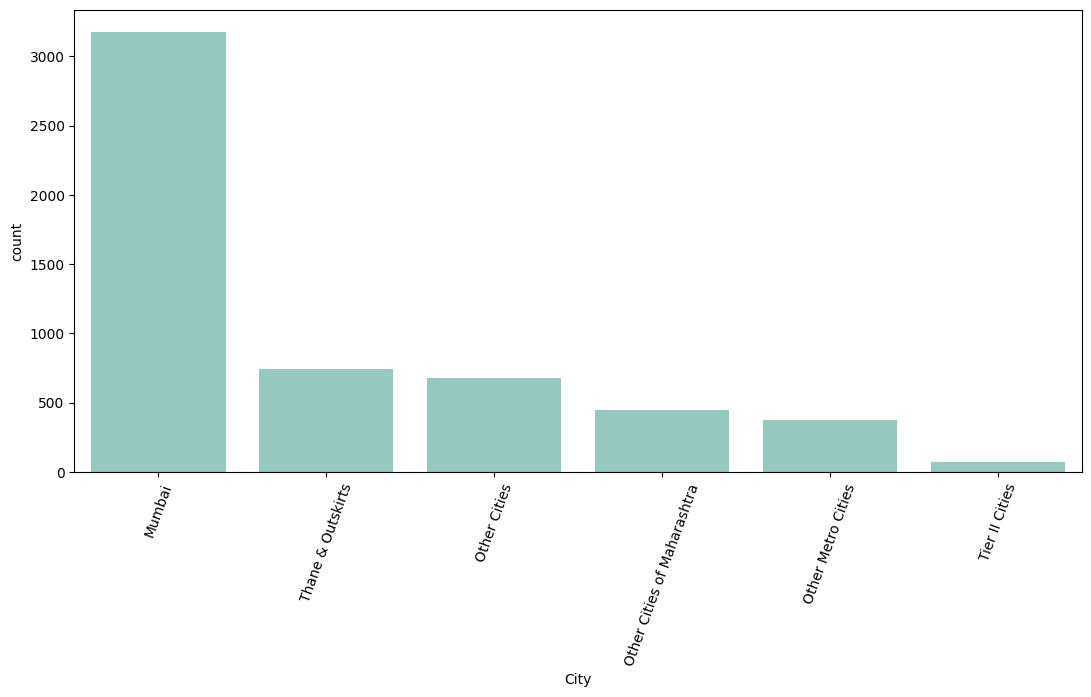

In [ ]:
data_new = data3[data3['City'] != 'Select']
city_count = data_new['City'].value_counts().index
sns.countplot(x = 'City', data=data_new, order = city_count)
plt.xticks(rotation=70);

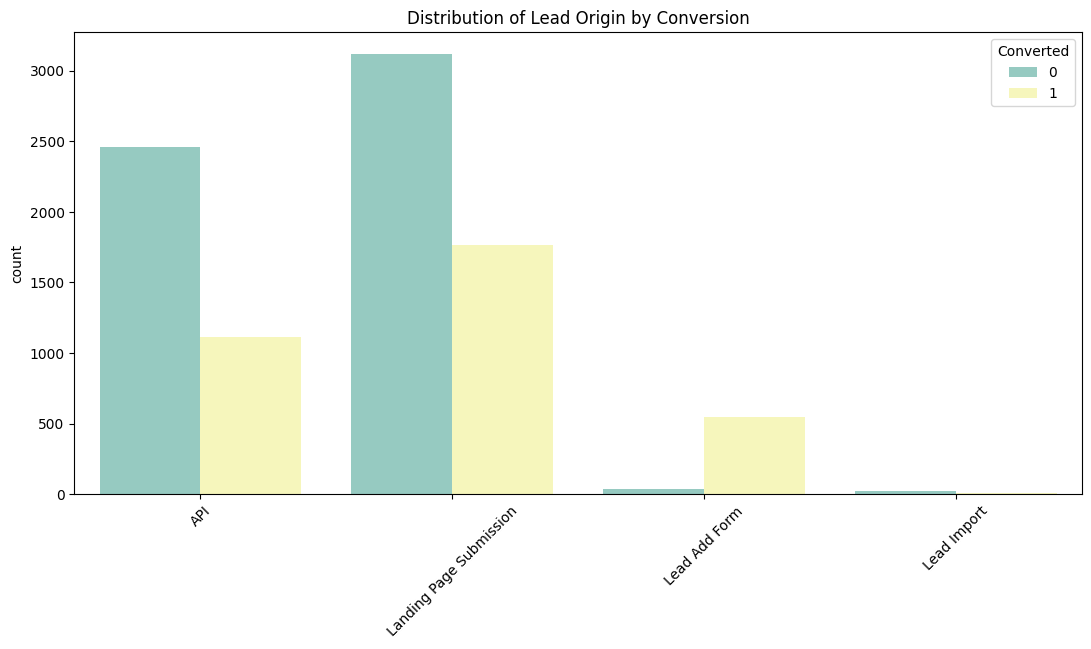

In [ ]:
sns.countplot(x = 'Lead Origin', data = data3, hue = 'Converted')
plt.xticks(rotation = 45)
plt.xlabel("")
plt.title("Distribution of Lead Origin by Conversion");

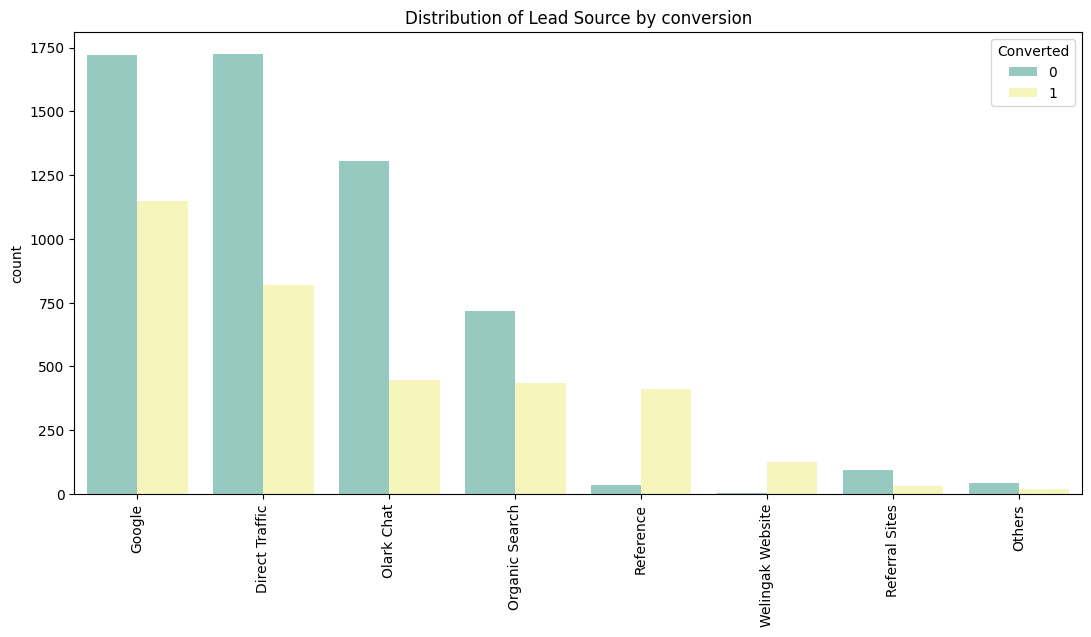

In [ ]:
sns.countplot(x = 'Lead Source', data = data3, hue = 'Converted', order = data3['Lead Source'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Distribution of Lead Source by conversion")
plt.xlabel("")
plt.show()

In [ ]:
data3.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,NaN,Select,Select,02.Medium,02.Medium,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No


In [ ]:
split_col = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']

for col in split_col:
  data3[col] = data3[col].apply(lambda x: str(x).split(".")[0].lstrip("0"))

In [ ]:
data3.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Low in Relevance,Select,Select,2,2,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,NaN,Select,Select,2,2,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,2,1,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Select,Mumbai,2,1,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Might be,Select,Mumbai,2,1,No


Encoding

In [ ]:
#applying ohe on the remaining categorical columns

# Select all categorical columns
cat_columns = data3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data3, columns=cat_columns)
data_encoded.shape

(9074, 90)

In [ ]:
data_encoded1 = data_encoded.copy()

In [ ]:
X = data_encoded.drop('Converted', axis=1)
y = data_encoded['Converted']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create the Normalizer object
scaler = StandardScaler()

# fit transform the data
X_scaled = scaler.fit_transform(X)

data = pd.DataFrame(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)
pred_prob1 = lr.predict_proba(X_test)[:,1]

threshold = 0.5
y_pred_lr = (pred_prob1 > threshold).astype(int)

In [ ]:
accuracy = lr.score(X_test, y_test)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred_lr)
print("precision: ", precision )

recall = recall_score(y_test, y_pred_lr)
print("Recall: ", recall)

f1 = f1_score(y_test, y_pred_lr)
print("F1 score: ", f1)

Accuracy:  0.9366391184573003
precision:  0.922173274596182
Recall:  0.9101449275362319
F1 score:  0.9161196207148068


In [ ]:
cm1 = confusion_matrix(y_test, y_pred_lr)
print(cm1)

[[1072   53]
 [  62  628]]


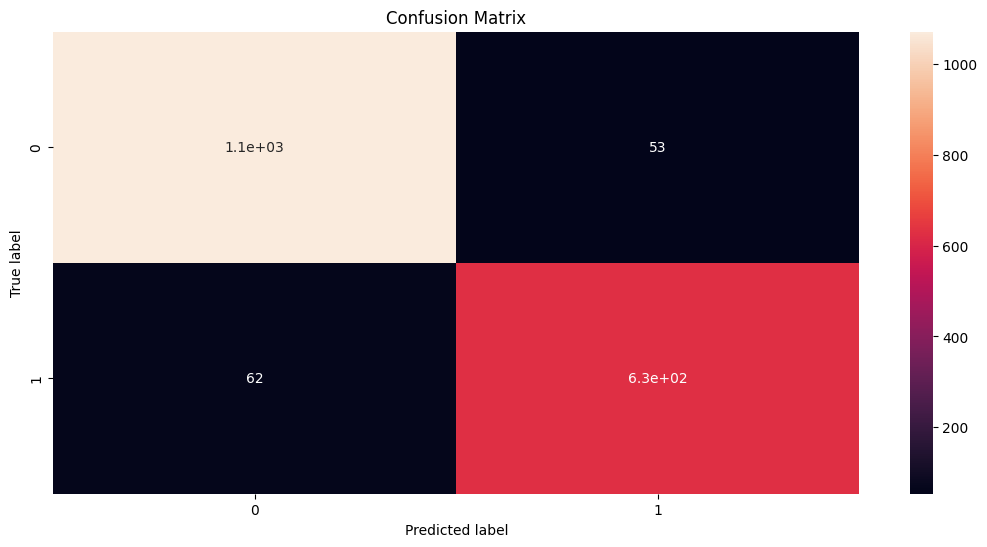

In [ ]:
sns.heatmap(cm1, annot = True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show();

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = lr.predict(X_test)

In [ ]:
accuracy_rf = rf.score(X_test, y_test)
print("Accuracy: ", accuracy_rf)

precision_rf = precision_score(y_test, y_pred_rf)
print("precision: ", precision_rf )

recall_rf = recall_score(y_test, y_pred_rf)
print("Recall: ", recall_rf)

f1_rf = f1_score(y_test, y_pred_rf)
print("F1 score: ", f1_rf)

Accuracy:  0.9371900826446281
precision:  0.922173274596182
Recall:  0.9101449275362319
F1 score:  0.9161196207148068


In [ ]:
cm2 = confusion_matrix(y_test, y_pred_rf)
print(cm2)

[[1072   53]
 [  62  628]]


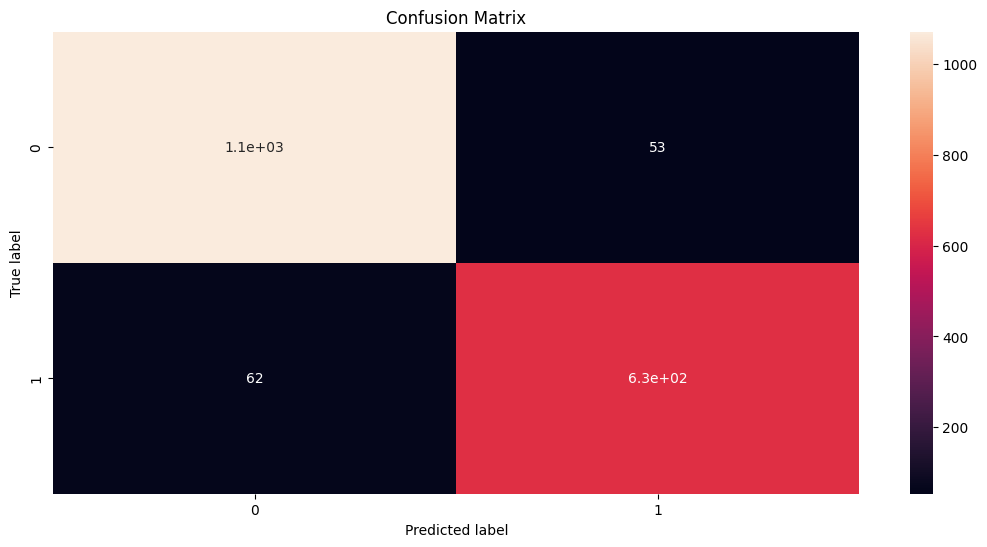

In [ ]:
sns.heatmap(cm2, annot = True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show();

In [ ]:
from sklearn.model_selection import GridSearchCV

#Fit logistic model
parameters_lr = {'penalty': ['l1', 'l2'], 'C' : np.logspace(-3,3,5,base=10.0)}
lr1 = LogisticRegression(solver='liblinear', random_state=123)

lr_cv = GridSearchCV(lr1, param_grid=parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_)
lr_best = lr_cv.best_estimator_

{'C': 0.03162277660168379, 'penalty': 'l2'}


In [ ]:
#Fit random forest classifier w/ hyperparameter tuning
parameters_rf = {'max_depth':np.arange(6,30,2),'min_samples_leaf':np.arange(100,500,50)}
rf1 = RandomForestClassifier()

rf_cv = GridSearchCV(rf1, param_grid=parameters_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

{'max_depth': 20, 'min_samples_leaf': 100}


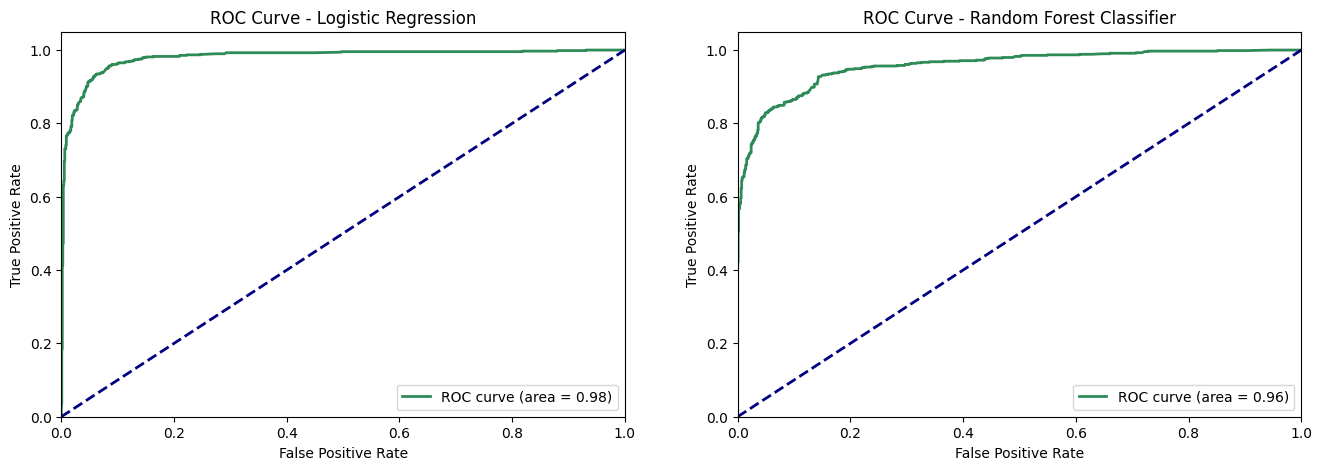

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
models = {'Logistic Regression':lr_best, 'Random Forest Classifier':rf_best}

for n,m in models.items():
    # Get predicted probabilities for the test set
    y_pred_proba = m.predict_proba(X_test)[:,1]

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    axes[list(models.keys()).index(n)].plot(fpr, tpr, color='seagreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[list(models.keys()).index(n)].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[list(models.keys()).index(n)].set_xlim([0.0, 1.0])
    axes[list(models.keys()).index(n)].set_ylim([0.0, 1.05])
    axes[list(models.keys()).index(n)].set_xlabel('False Positive Rate')
    axes[list(models.keys()).index(n)].set_ylabel('True Positive Rate')
    axes[list(models.keys()).index(n)].set_title('ROC Curve - ' + n)
    axes[list(models.keys()).index(n)].legend(loc="lower right")

plt.show()


#### The Logistic Regression model performs slightly better as it shows a higher curve than Random Forest Classifier